## Import libraries

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import data file

In [3]:
wtsup = pd.read_csv('Whatsapp_chat.csv', index_col=0)
wtsup

,hours,days,months,names,timestamp
0,1,19,May,Person4,2020-05-19
1,22,19,May,Person3,2020-05-19
2,22,19,May,Person3,2020-05-19
3,22,19,May,Person1,2020-05-19
4,22,19,May,Person3,2020-05-19
...,...,...,...,...,...
51570,19,12,August,Person3,2020-08-12
51571,19,12,August,Person1,2020-08-12
51572,20,12,August,Person3,2020-08-12
51573,21,12,August,Person1,2020-08-12


In [4]:
wtsup.groupby('names').count()

,hours,days,months,timestamp
names,,,,
Person1,17543,17543,17543,17543
Person2,3835,3835,3835,3835
Person3,13514,13514,13514,13514
Person4,16683,16683,16683,16683


In [5]:
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((3,3))

## Let's  check how many messages that every person sent 

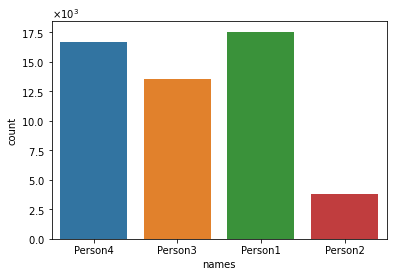

In [6]:
sns.countplot(x='names', data=wtsup).yaxis.set_major_formatter(formatter)  

In [7]:
wtsup_temp = wtsup['names'].value_counts()
wtsup_temp

Person1    17543
Person4    16683
Person3    13514
Person2     3835
Name: names, dtype: int64

[Text(0, 0.5, 'message ratios')]

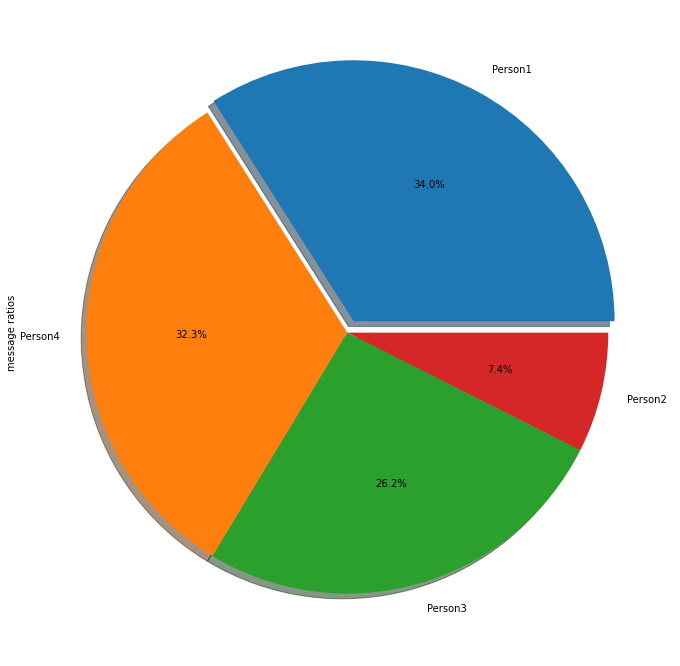

In [8]:
wtsup_temp.plot.pie(figsize=(12,12), legend=False, autopct='%1.1f%%', shadow=True, explode=(0.05, 0, 0, 0)).set(ylabel='message ratios')

## shows distribution among hours of a day

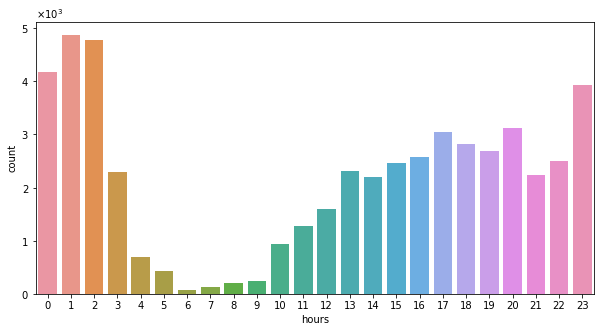

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='hours', data=wtsup).yaxis.set_major_formatter(formatter) 

In [10]:
wtsup_by_date = wtsup.groupby(['months', 'days']).count()
wtsup_by_date

hours  names  timestamp
months days                         
August 1      1299   1299       1299
       2      1334   1334       1334
       3       398    398        398
       4       576    576        576
       5       358    358        358
...            ...    ...        ...
May    27      423    423        423
       28      541    541        541
       29      175    175        175
       30     1418   1418       1418
       31      434    434        434

[83 rows x 3 columns]

[Text(0.5, 1.0, 'Message Density of Each Day')]

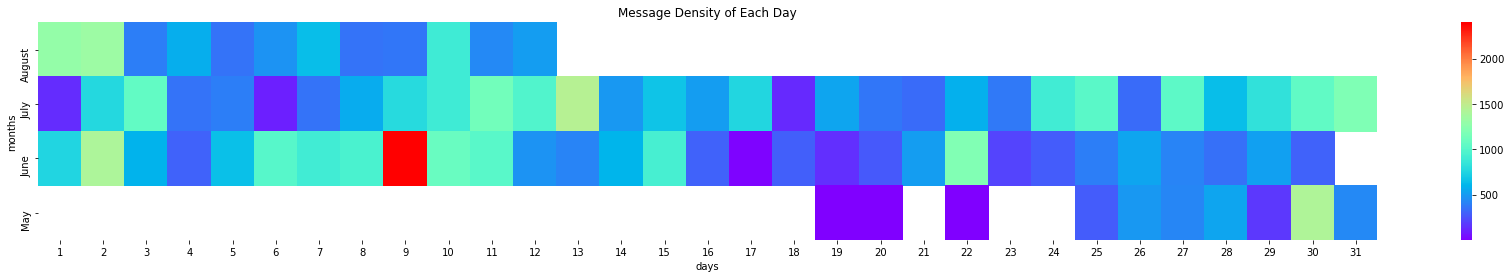

In [11]:
wtsup_heat = wtsup_by_date.pivot_table(values='hours', index='months', columns='days')
plt.figure(figsize=(30,4))
sns.heatmap(wtsup_heat, cmap='rainbow').set(title='Message Density of Each Day')

In [12]:
wtsup_by_timestamp = wtsup[['timestamp', 'names']].value_counts().unstack(level=1).fillna(0) #groups data frame by timestamp and shows how many messages are sent by each person
wtsup_by_timestamp

names,Person1,Person2,Person3,Person4
timestamp,,,,
2020-05-19,5.0,0.0,3.0,1.0
2020-05-20,0.0,1.0,0.0,0.0
2020-05-22,4.0,0.0,0.0,0.0
2020-05-25,128.0,7.0,46.0,105.0
2020-05-26,200.0,7.0,145.0,144.0
...,...,...,...,...
2020-08-08,125.0,1.0,84.0,150.0
2020-08-09,82.0,5.0,129.0,153.0
2020-08-10,309.0,58.0,241.0,288.0


<AxesSubplot:xlabel='timestamp'>

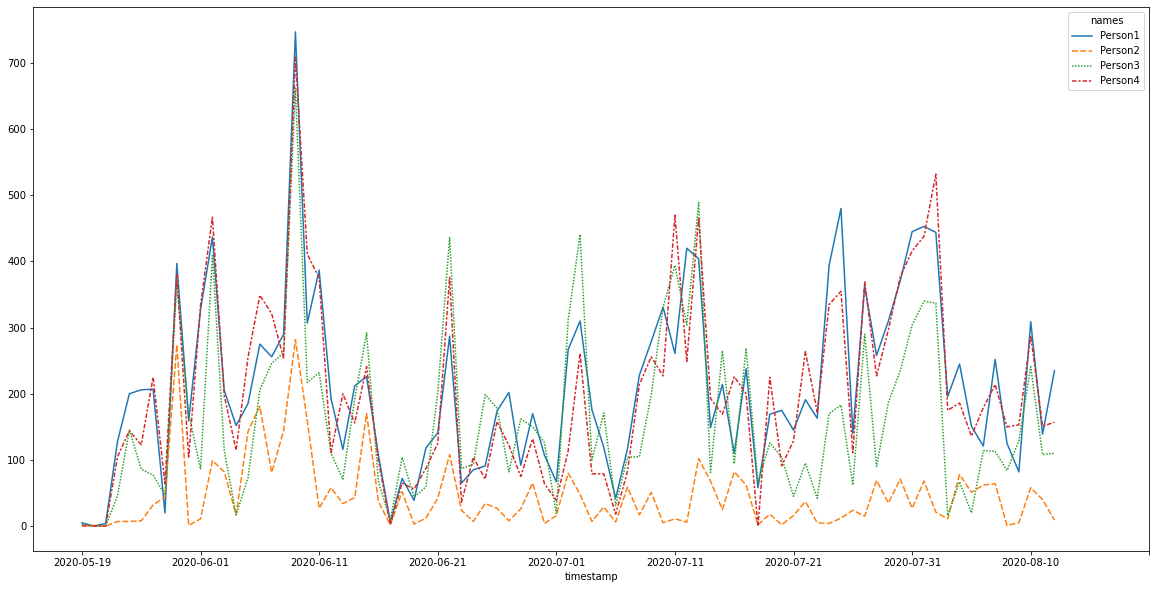

In [13]:
plt.figure(figsize=(20,10))
'''ax = sns.lineplot(data=wtsup_by_timestamp["Person1"])
ax = sns.lineplot(data=wtsup_by_timestamp["Person2"])
ax = sns.lineplot(data=wtsup_by_timestamp["Person3"])
ax = sns.lineplot(data=wtsup_by_timestamp["Person4"])'''
ax = sns.lineplot(data=wtsup_by_timestamp)
ax.xaxis.set_ticks(np.arange(0, 100, 10))
ax

## extracting column values for further examination

In [14]:
names = np.array(wtsup['names'])
hours = np.array(wtsup['hours'])
dates = np.array(wtsup['timestamp'])

## according to names and dates, examines columns and counts how many consecutive messages are sent by only two people in an ongoing conversation


## and indicates in which time interval that messages are taken place


## the message number must be greater than 49 to be considered as a streak

In [15]:

date_list = []
name_pair = []
time_interval = []
count = 0
name_pair_list = []
streak_list = []
time_interval_list = []
index = 0
for name in names:
    if len(name_pair) == 0:
        count += 1
        name_pair.append(name)
        date = dates[index]
        time_interval.append(hours[index])
    elif len(name_pair) == 1:
        count += 1
        if name not in name_pair:
            name_pair.append(name)
            if len(time_interval) == 2:
                time_interval[1] = hours[index]
            else:
                time_interval.append(hours[index])
    elif name in name_pair:
        time_interval[1] = hours[index]
        count += 1
    else:
        if count>49:
            streak_list.append(count)
            copy_pair = sorted(name_pair)
            name_pair_list.append((copy_pair[0], copy_pair[1]))
            time_interval_list.append((time_interval[0], time_interval[1]))
            date_list.append(date)
        count = 1
        name_pair.pop(0)
        time_interval.pop(0)
        name_pair.append(name)
        time_interval.append(hours[index])
        date = dates[index]
    index += 1

## new DataFrame that shows how many messages are sent by people pairs as streaks

In [16]:
wtsup_streaks = pd.DataFrame({'Name Pairs':name_pair_list, 'Streak Counts':streak_list, 'Time Interval':time_interval_list, 'Timestamp':date_list})
wtsup_streaks.sort_values(by='Streak Counts', ascending=False)

,Name Pairs,Streak Counts,Time Interval,Timestamp
6,"(Person1, Person4)",493,"(22, 2)",2020-05-31
92,"(Person1, Person4)",359,"(23, 0)",2020-08-03
5,"(Person1, Person4)",316,"(18, 1)",2020-05-28
49,"(Person3, Person4)",286,"(2, 4)",2020-07-11
45,"(Person1, Person4)",213,"(21, 23)",2020-07-08
...,...,...,...,...
48,"(Person1, Person4)",51,"(23, 23)",2020-07-10
52,"(Person1, Person3)",51,"(22, 23)",2020-07-12
104,"(Person1, Person4)",51,"(17, 17)",2020-08-12
8,"(Person2, Person4)",50,"(3, 10)",2020-06-02


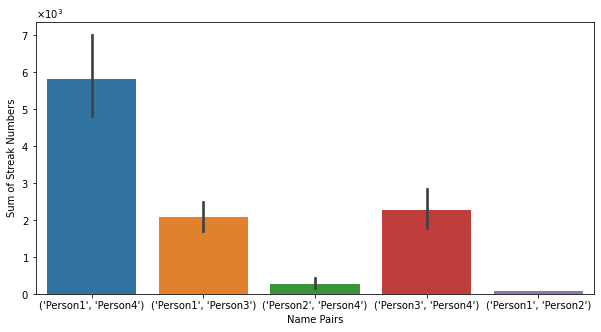

In [17]:
plt.figure(figsize=(10,5))
axes = sns.barplot(x='Name Pairs', y ='Streak Counts', data=wtsup_streaks, estimator=np.sum)
axes.set(ylabel='Sum of Streak Numbers')
axes.yaxis.set_major_formatter(formatter)